<a href="https://colab.research.google.com/github/yuanjinren/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/YuanjinRen_LS_DS_Unit_4_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
Neuron is the basic component of the neural network. They are highly interconnected elements which are organized in layers which process information using dynamic state responses to external inputs.
- **Input Layer:**
It is the starting point of the neural network, which would communicate to hidden layers. Nodes in input layer are passive since they don't change the data. Their job is receiving value and then sending to the next hidden layer. 
- **Hidden Layer:**
Hidden layer(s) are layers between input layer and output layer. All mathematical operations are executed in hidden layers. Hidden layers make the neural networks as superior to machine learning algorithms.
- **Output Layer:**
Output layer is the last layer of the neural network. It produces the final output results. The output layer takes the inputs which are passed in from the layers before it, and performs the calculations through its neurons and then the output is computed.
- **Activation Function:**
Activation functions are a crucial component of deep learning. They are used to determine the firing of neurons in a neural network. They are different types of activation functions in different neural network, basically, can be divided into linear activation function and non-linear activation function. 

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

To understand back propagation, we need to know forward propagation first. In a neural network, the input data is fed in the forward direction through the network through input layer and hidden layers. There are several nodes in different layers. For each node in each layer, we need to give it a weight to help it do the calculation. Each hidden layer accepts the input data, processes it as per the weights and activation function, and then passes to the next layer. This process is called forward propagation. 

If we compare the result to our expected output, we will discover that our prediction is incorrect. Since we want to find the absolute best weight values that would help calculate the correct output based on any given input, we need to first calculate an error value using an error function, which should be minimized. This whole process of going back to track through the network is called back propagation. Gradient descent method is normally used to find out the minimum value of error function. This back propagation algorithm also can be treated as a training process. 

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

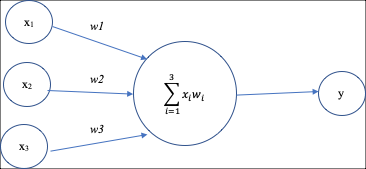

The above picture is a simple perceptron. X1, x2, x3 are inputs, w1, w2 and w3 are weights, 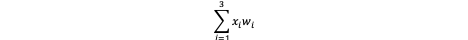is computation occurs in neuron, and y is the final output. 

First, take the inputs from the input layer, and use the value of each node times each weight. Secondly, these input-weight products are summed and then the sum is passed through a node’s so-called activation function, to determine whether and to what extent that signal should progress further through the network. The result we get after activation function calculation is the final output y.  

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [24]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [9]:
X.shape, y.shape

((300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np


# Instantiating Model
model1 = Sequential([
    Dense(3, activation="sigmoid", input_dim=2),
    Dense(1, activation="sigmoid")
])

# Compile
model1.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

# Fitting and Results
h1 = model1.fit(X, y, epochs=100, batch_size=10)

# Scores
scores = model1.evaluate(X, y)
print(f"{model1.metrics_names[1]}: {scores[1]}")

Epoch 1/100
30/30 [==============================] - 0s 964us/step - loss: 0.7447 - accuracy: 0.4733
Epoch 2/100
30/30 [==============================] - 0s 917us/step - loss: 0.7338 - accuracy: 0.4733
Epoch 3/100
30/30 [==============================] - 0s 951us/step - loss: 0.7254 - accuracy: 0.4733
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.4733
Epoch 5/100
30/30 [==============================] - 0s 985us/step - loss: 0.7138 - accuracy: 0.4600
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7098 - accuracy: 0.4533
Epoch 7/100
30/30 [==============================] - 0s 944us/step - loss: 0.7067 - accuracy: 0.4200
Epoch 8/100
30/30 [==============================] - 0s 967us/step - loss: 0.7044 - accuracy: 0.4033
Epoch 9/100
30/30 [==============================] - 0s 941us/step - loss: 0.7026 - accuracy: 0.4000
Epoch 10/100
30/30 [==============================] - 0s 976us/step - loss: 0.7010 - accuracy: 

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [13]:
from keras.optimizers import Adam, SGD

In [25]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [36]:
mycallback = myCallback()
model2 = Sequential([
    Dense(32, activation="relu", input_dim=2),
    Dense(32, activation='relu'),
    Dense(1, activation="sigmoid")
])
opt = Adam(learning_rate=0.001)
# Compile
model2.compile(optimizer=opt, 
               loss="binary_crossentropy", 
               metrics=["accuracy"]
               )

# Fitting and Results
h2 = model2.fit(X, y, epochs=100, batch_size=10, callbacks=[mycallback])
scores = model2.evaluate(X, y)
print(f"{model2.metrics_names[1]}: {scores[1]}")

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6733
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.7900
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.8200
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8567
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.8967
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.9400
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.9600
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.9700
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.9767
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2386 - accuracy: 0.9800
Epoch 11/

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [32]:
!pip install mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


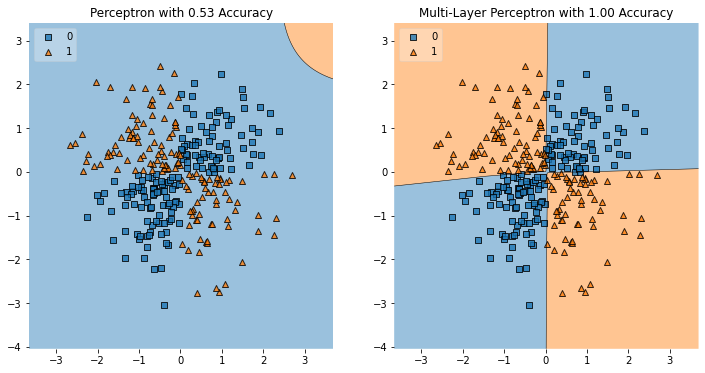

In [38]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show();

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

The added layers, and the ability to "backpropagate" account for why the score is so dramatically improved. A perceptron is limited to a feed-forward process, so it can't go back to implement back propagation (i.e. making adjustments on the error and the weights). The multilayer has better performance because it can "learn" from this error, which allows us to get these high accuracy scores in our predictions.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0


# import packages

In [40]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# baseline model

In [41]:
scaler = MinMaxScaler()
df_transform = scaler.fit_transform(df)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_transform[:, :-1], df_transform[:, -1], 
test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [47]:
def create_model():
  opt = Adam(learning_rate=0.01)
  model = Sequential([
                      Dense(32, input_dim=13, activation='relu'),
                      Dense(20, activation='relu'),
                      Dense(1, activation='sigmoid')               
  ])
  model.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  print(model.summary())
  return model

In [49]:
baseline = create_model()
baseline.fit(X_train, y_train, epochs=100, 
             batch_size=15,
             validation_data=(X_test, y_test),
             verbose=1,
             callbacks = [mycallback])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_59 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 21        
Total params: 1,129
Trainable params: 1,129
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6028 - accuracy: 0.7025 - val_loss: 0.5120 - val_accuracy: 0.7377
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8264 - val_loss: 0.4715 - val_accuracy: 0.7869
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.

In [50]:
baseline_scores = baseline.evaluate(X_test, y_test)
print(f"{baseline.metrics_names[1]}: {baseline_scores[1]}")

2/2 [==============================] - 0s 3ms/step - loss: 1.9288 - accuracy: 0.6885
accuracy: 0.688524603843689


# hyperparameter tuning

Since the baseline model is overfitting, accuracy rate of testing dataset is not good. Next I will do some tuning to reduce overfitting and improve accuracy of validation data.  

In [55]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [65]:
def create_model2():
  opt = Adam(learning_rate=0.01)
  wd = 0.001
  model = Sequential([
                      Dense(32, input_dim=13, activation='relu', kernel_regularizer=regularizers.l2(wd)),
                      Dropout(0.3),
                      Dense(20, activation='relu',kernel_regularizer=regularizers.l1(wd)),
                      Dropout(0.3),
                      Dense(1, activation='sigmoid')               
  ])
  model.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  print(model.summary())
  return model

In [66]:
model2 = create_model2()
model2.fit(X_train, y_train, epochs=100, 
             batch_size=15,
             validation_data=(X_test, y_test),
             verbose=1)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 32)                448       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 20)                660       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 21        
Total params: 1,129
Trainable params: 1,129
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 0.7198 - accuracy: 0.6818 - val_loss: 0

In [67]:
model2_scores = model2.evaluate(X_test, y_test)
print(f"{model2.metrics_names[1]}: {model2_scores[1]}")

2/2 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.7705
accuracy: 0.7704917788505554


Build another model for grid search parameter tuning purpose. 

In [69]:
def gridsearch_create_model(lr=0.01):
  # create model
  model = Sequential()
  model.add(Dense(10, input_dim=13, activation='relu'))
  model.add(Dense(5, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # compile model
  sgd = SGD(learning_rate=lr)
  model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

  return model
  

In [70]:
baseline_grid_model = gridsearch_create_model()
baseline_grid_model.fit(X_train, y_train, epochs=100, 
             batch_size=15,
             validation_data=(X_test, y_test),
             verbose=1)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 0.7508 - accuracy: 0.5372 - val_loss: 0.7232 - val_accuracy: 0.5738
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7357 - accuracy: 0.5372 - val_loss: 0.7142 - val_accuracy: 0.5738
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7241 - accuracy: 0.5372 - val_loss: 0.7094 - val_accuracy: 0.5738
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7177 - accuracy: 0.5372 - val_loss: 0.7061 - val_accuracy: 0.5738
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.5372 - val_loss: 0.7026 - val_accuracy: 0.5738
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5372 - val_loss: 0.7002 - val_accuracy: 0.5902
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.5372 - val_loss: 0.6986 - val_accuracy: 0.5902
Epoch 8/100
1

In [77]:
baselinegrid_scores = baseline_grid_model.evaluate(X_test, y_test)
print(f"{baseline_grid_model.metrics_names[1]}: {baselinegrid_scores[1]}")

2/2 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7869
accuracy: 0.7868852615356445


In [71]:
# create model
gridsearch_model = KerasClassifier(build_fn=gridsearch_create_model, verbose=1)

# define the grid search parameters
param_grid = {
    'epochs': [50,100],
    'batch_size': [32, 64, 128],
    'lr': [0.001, 0.01, 0.1]
}

# Create Grid Search
grid = GridSearchCV(estimator=gridsearch_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.5372
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5455
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5620
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5785
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6653
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7025
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7107
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7231
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.7438
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.7355
Epoch 11/100
8/8 [===========

In [73]:
# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
print("\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print(f"Means: {mean}, Stdev: {stdev} with: {params}")

Best: 0.8511316776275635 using {'batch_size': 32, 'epochs': 100, 'lr': 0.1}


Means: 0.632253090540568, Stdev: 0.04049115237585761 with: [{'batch_size': 32, 'epochs': 50, 'lr': 0.001}, {'batch_size': 32, 'epochs': 50, 'lr': 0.01}, {'batch_size': 32, 'epochs': 50, 'lr': 0.1}, {'batch_size': 32, 'epochs': 100, 'lr': 0.001}, {'batch_size': 32, 'epochs': 100, 'lr': 0.01}, {'batch_size': 32, 'epochs': 100, 'lr': 0.1}, {'batch_size': 64, 'epochs': 50, 'lr': 0.001}, {'batch_size': 64, 'epochs': 50, 'lr': 0.01}, {'batch_size': 64, 'epochs': 50, 'lr': 0.1}, {'batch_size': 64, 'epochs': 100, 'lr': 0.001}, {'batch_size': 64, 'epochs': 100, 'lr': 0.01}, {'batch_size': 64, 'epochs': 100, 'lr': 0.1}, {'batch_size': 128, 'epochs': 50, 'lr': 0.001}, {'batch_size': 128, 'epochs': 50, 'lr': 0.01}, {'batch_size': 128, 'epochs': 50, 'lr': 0.1}, {'batch_size': 128, 'epochs': 100, 'lr': 0.001}, {'batch_size': 128, 'epochs': 100, 'lr': 0.01}, {'batch_size': 128, 'epochs': 100, 'lr': 0.1}]
Means: 0.7190329233

# Summary

**No Grid Search:**

1st overfitting model(learning rate: 0.01, epochs=100, batchsize=15, two dense layers, one is 32 units, the other is 20): 

    accuracy rate for training dataset: 1, 
    accuracy rate for testing dataset: 0.6885

with dropout layer and L2 regularizer(dropout: 0.3, l2):

    accuracy rate for training dataset: 0.8802, 
    accuracy rate for testing dataset: 0.77

**With Grid Search:**

baseline model(learning rate: 0.01, epochs=100, batchsize=15, two dense layers, one is 10 units, the other is 5):

    accuracy rate for training dataset: 0.8347, 
    accuracy rate for testing dataset: 0.7868

after grid search tuning (batchsize: 32, epochs: 100, learning rate: 0.1):

    accuracy rate for training dataset: 0.8719, 
    accuracy rate for testing dataset: 0.8511
